# Veri Setini Hazırlama

In [41]:
#Veri setini yükleme
import pandas as pd
t_data = pd.read_csv("train.csv")
p_data = pd.read_csv("predict.csv")

In [42]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,S
1,2,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
2,3,0,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S
3,4,0,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.7500,NaN,Q
4,5,0,3,"Thomas, Mr. Tannous",male,NaN,0,0,2684,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,0,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S
347,348,0,3,"Brobeck, Mr. Karl Rudolf",male,22.0,0,0,350045,7.7958,NaN,S
348,349,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
349,350,0,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C


In [43]:
p_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q
1,2,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S
2,3,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
3,4,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
4,5,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
...,...,...,...,...,...,...,...,...,...,...,...
62,63,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S
63,64,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,21228,82.2667,B45,S
64,65,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C
65,66,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,NaN,S


# VERİ ÖN İŞLEME VE VERİ TEMİZLEME

In [44]:
# Eksik verileri kontrol edelim
print(t_data.isnull().sum())
print(p_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          271
Embarked         0
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            15
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          56
Embarked        0
dtype: int64


In [45]:

# Age (Yaş) sütunundaki eksik verileri median (ortanca) ile dolduralım
t_data['Age'].fillna(t_data['Age'].median(), inplace=True)

# Age (Yaş) sütunundaki eksik verileri median (ortanca) ile dolduralım
p_data['Age'].fillna(p_data['Age'].median(), inplace=True)

* Name sütununu kaldırıyoruz

In [46]:
t_data.drop(columns=['Name'],inplace=True)
p_data.drop(columns=['Name'],inplace=True)

* Ayrıca sonra kabin satırını kaldıracağız.

In [47]:

t_data.drop(columns=['Cabin'], inplace=True)
p_data.drop(columns=['Cabin'], inplace=True)


* Ticket kısmında sayısal değer içermeyenleri ticket değerinin ortalama değerini kullanarak dolduracagımız fonksiyonu yazalım.

In [48]:
import numpy as np

# Ticket kolonu sayısal değerlere çevirme ve harf içerenleri bulma
def is_numeric(ticket):
    try:
        float(ticket)
        return True
    except ValueError:
        return False

# Sayısal ticket değerlerini al ve ortalamayı hesapla
numeric_tickets = t_data['Ticket'].apply(lambda x: float(x) if is_numeric(x) else np.nan)
average_ticket = numeric_tickets.mean()

# Harf içeren ticket değerlerini ortalama ile doldur
t_data['Ticket'] = t_data['Ticket'].apply(lambda x: average_ticket if not is_numeric(x) else x)

# Sayısal ticket değerlerini al ve ortalamayı hesapla
numeric_tickets2 = p_data['Ticket'].apply(lambda x: float(x) if is_numeric(x) else np.nan)
average_ticket2 = numeric_tickets2.mean()

# Harf içeren ticket değerlerini ortalama ile doldur
p_data['Ticket'] = p_data['Ticket'].apply(lambda x: average_ticket2 if not is_numeric(x) else x)


In [49]:
t_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,female,33.0,1,2,205529.434959,20.5750,S
1,2,1,1,female,36.0,0,0,205529.434959,262.3750,C
2,3,0,1,male,24.0,1,0,13695,60.0000,S
3,4,0,3,male,27.0,0,0,368783,7.7500,Q
4,5,0,3,male,27.0,0,0,2684,7.2250,C
...,...,...,...,...,...,...,...,...,...,...
346,347,0,3,male,25.0,0,0,348122,7.6500,S
347,348,0,3,male,22.0,0,0,350045,7.7958,S
348,349,1,1,female,48.0,1,3,205529.434959,262.3750,C
349,350,0,3,male,21.0,0,0,2692,7.2250,C


In [50]:
p_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,female,22.0,0,0,334914,7.7250,Q
1,2,2,male,28.0,0,0,313993.04,10.5000,S
2,3,3,male,40.0,1,6,313993.04,46.9000,S
3,4,1,male,61.0,1,3,313993.04,262.3750,C
4,5,1,male,50.0,1,1,113503,211.5000,C
...,...,...,...,...,...,...,...,...,...
62,63,2,female,45.0,0,2,237789,30.0000,S
63,64,1,male,24.0,1,0,21228,82.2667,S
64,65,2,female,30.0,1,0,313993.04,13.8583,C
65,66,2,female,24.0,1,2,220845,65.0000,S


* Cinsiyet ve biniş limanını sayısal değer olarak değiştirme

In [51]:
# Cinsiyet ve Biniş Limanı gibi kategorik değişkenleri sayısal değerlere dönüştürelim
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
t_data['Sex'] = label_encoder.fit_transform(t_data['Sex'])
t_data['Embarked'] = label_encoder.fit_transform(t_data['Embarked'])

In [52]:
label_encoder = LabelEncoder()
p_data['Sex'] = label_encoder.fit_transform(p_data['Sex'])
p_data['Embarked'] = label_encoder.fit_transform(p_data['Embarked'])

* Ticket kategorisini kaldırıyoruz.

In [53]:
t_data.drop(columns=['Ticket'],inplace=True)
p_data.drop(columns=['Ticket'],inplace=True)

In [54]:
t_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,3,0,33.0,1,2,20.5750,2
1,2,1,1,0,36.0,0,0,262.3750,0
2,3,0,1,1,24.0,1,0,60.0000,2
3,4,0,3,1,27.0,0,0,7.7500,1
4,5,0,3,1,27.0,0,0,7.2250,0
...,...,...,...,...,...,...,...,...,...
346,347,0,3,1,25.0,0,0,7.6500,2
347,348,0,3,1,22.0,0,0,7.7958,2
348,349,1,1,0,48.0,1,3,262.3750,0
349,350,0,3,1,21.0,0,0,7.2250,0


In [55]:
p_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,0,0,7.7250,1
1,2,2,1,28.0,0,0,10.5000,2
2,3,3,1,40.0,1,6,46.9000,2
3,4,1,1,61.0,1,3,262.3750,0
4,5,1,1,50.0,1,1,211.5000,0
...,...,...,...,...,...,...,...,...
62,63,2,0,45.0,0,2,30.0000,2
63,64,1,1,24.0,1,0,82.2667,2
64,65,2,0,30.0,1,0,13.8583,0
65,66,2,0,24.0,1,2,65.0000,2


* Boxplot ile veri dagıtmak için **IQR** (interquartile range) arasındaki değişimleri takip edelim.

In [56]:
t_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,3,0,33.0,1,2,20.5750,2
1,2,1,1,0,36.0,0,0,262.3750,0
2,3,0,1,1,24.0,1,0,60.0000,2
3,4,0,3,1,27.0,0,0,7.7500,1
4,5,0,3,1,27.0,0,0,7.2250,0
...,...,...,...,...,...,...,...,...,...
346,347,0,3,1,25.0,0,0,7.6500,2
347,348,0,3,1,22.0,0,0,7.7958,2
348,349,1,1,0,48.0,1,3,262.3750,0
349,350,0,3,1,21.0,0,0,7.2250,0


* Boxplot ile aykırı değerlerin temizlenmesi

In [57]:
p_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,0,0,7.7250,1
1,2,2,1,28.0,0,0,10.5000,2
2,3,3,1,40.0,1,6,46.9000,2
3,4,1,1,61.0,1,3,262.3750,0
4,5,1,1,50.0,1,1,211.5000,0
...,...,...,...,...,...,...,...,...
62,63,2,0,45.0,0,2,30.0000,2
63,64,1,1,24.0,1,0,82.2667,2
64,65,2,0,30.0,1,0,13.8583,0
65,66,2,0,24.0,1,2,65.0000,2


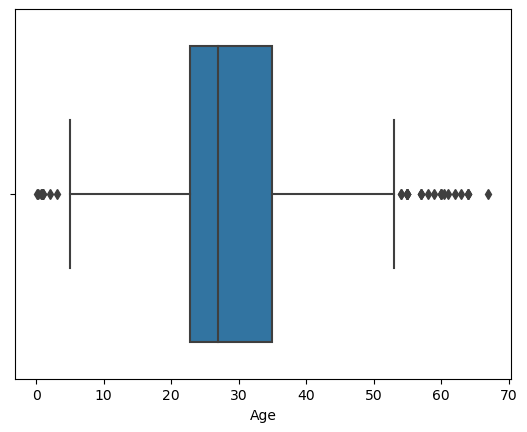

In [58]:
import seaborn as sns
sns.boxplot(x = t_data["Age"]);

* IQR yöntemini bir metod içinde yazalım ve ardından bu metodu hem train hem de test veri seti için uygulayalım.

In [59]:
def apply_iqr(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

def replace_with_iqr(df, variable):
    
    low_limit, up_limit = apply_iqr(df, variable)
    df.loc[(df[variable] < low_limit), variable] = df[variable].mean()
    df.loc[(df[variable] > up_limit), variable] = df[variable].mean()

In [60]:
#Tüm columnları listele
num_cols =["Sex","Age","SibSp","Parch","Fare"]

In [61]:
for col in num_cols:
    replace_with_iqr(t_data, col)

* Sonrasında boxplot ile de kontrol edelim.

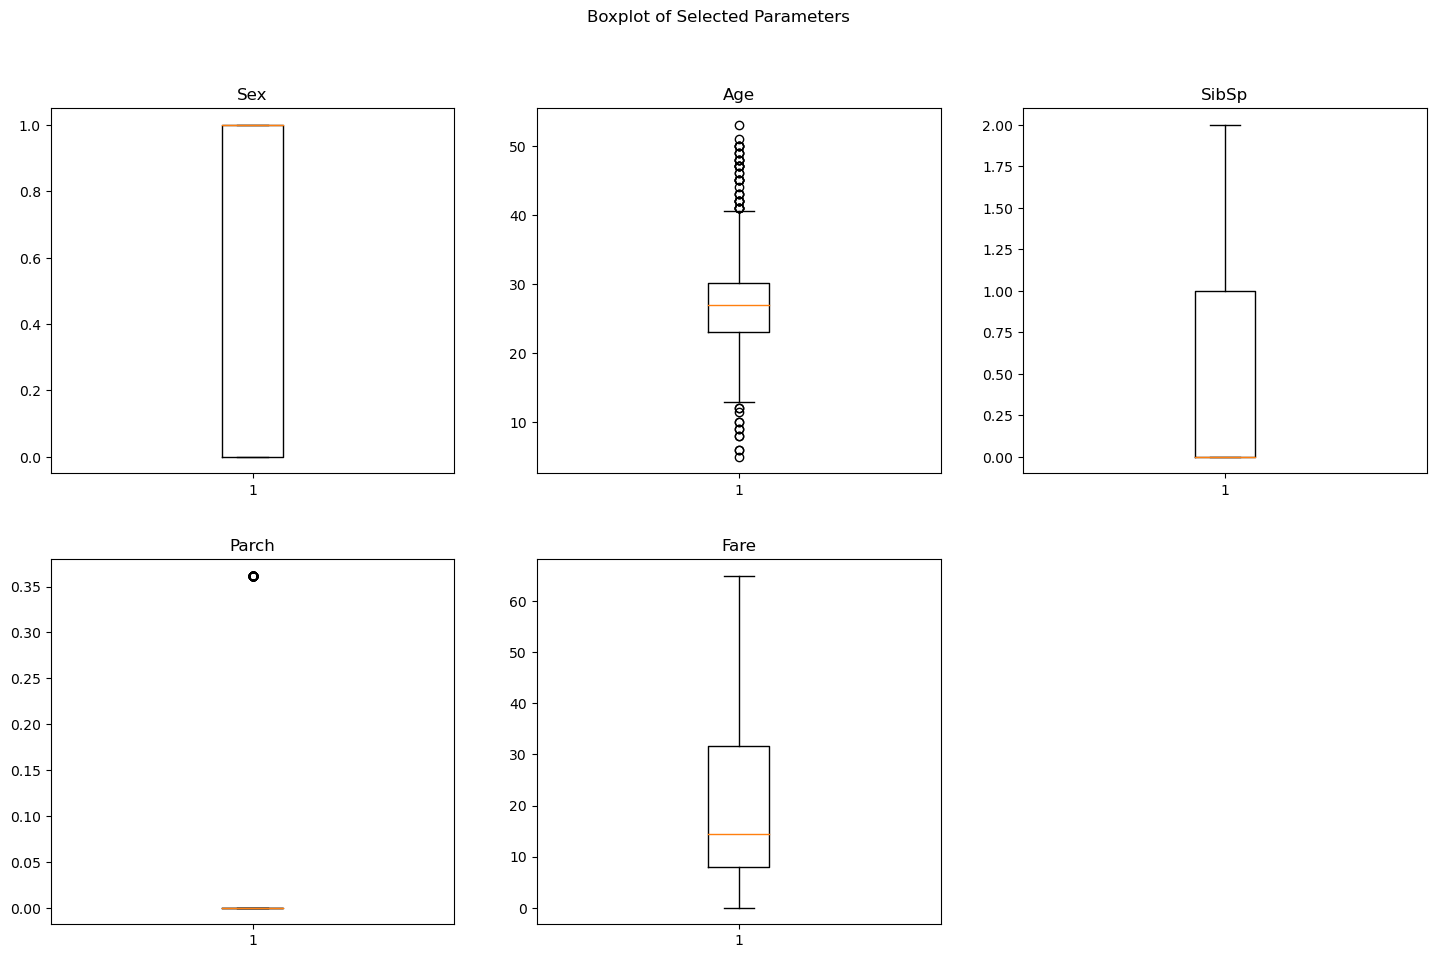

In [62]:
import matplotlib.pyplot as plt
import pandas as pd


# 2x3 alt eksenler oluşturma
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# İlgili kolonlar için boxplot çizme
for i, col in enumerate(num_cols):
    ax = axs.flat[i]
    ax.boxplot(t_data[col].dropna())  # Boş değerleri düşürme
    ax.set_title(col)

# Eğer 6'dan az kolon varsa, boş kalan eksenleri gizle
for j in range(len(num_cols), 6):
    fig.delaxes(axs.flat[j])

# Alt başlıklar ve boşlukları ayarlama
fig.suptitle('Boxplot of Selected Parameters')
fig.tight_layout(pad=3.0)
plt.show()


# MODEL İLE EĞİTİM ve MODEL DEĞERLENDİRME

In [78]:
X = t_data.drop(["Survived"], axis = 1)
y = t_data["Survived"]

In [79]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0.0,33.0,1.0,0.361823,20.575000,2
1,2,1,0.0,36.0,0.0,0.000000,37.040572,0
2,3,1,1.0,24.0,1.0,0.000000,60.000000,2
3,4,3,1.0,27.0,0.0,0.000000,7.750000,1
4,5,3,1.0,27.0,0.0,0.000000,7.225000,0
...,...,...,...,...,...,...,...,...
346,347,3,1.0,25.0,0.0,0.000000,7.650000,2
347,348,3,1.0,22.0,0.0,0.000000,7.795800,2
348,349,1,0.0,48.0,1.0,0.361823,37.040572,0
349,350,3,1.0,21.0,0.0,0.000000,7.225000,0


* Makine öğrenmesi modellerninin kütüphanelerini içe aktaralım.

In [90]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



* NaN var hatası alıyoruz. O satırları kaldırıyoruz.

In [91]:
# NaN değerlerini içeren satırları kaldırın
t_data.dropna(inplace = True)


In [92]:
# DataFrame'inizdeki her sütundaki NaN değerlerinin sayısını görün
nan_counts = t_data.isna().sum()
print(nan_counts)

# Toplam NaN değeri sayısını görün
total_nan_counts = t_data.isna().sum().sum()
print(f"Toplam NaN değeri sayısı: {total_nan_counts}")

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Toplam NaN değeri sayısı: 0


In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-1.72385169,  0.90025633, -1.28511289, ...,  1.93125082,
        -0.02412114,  0.72429568],
       [-1.71399032, -1.45996625, -1.28511289, ..., -0.51779913,
         1.09465633, -1.61214199],
       [-1.70412895, -1.45996625,  0.77814175, ..., -0.51779913,
         2.65466834,  0.72429568],
       ...,
       [ 1.70790445, -1.45996625, -1.28511289, ...,  1.93125082,
         1.09465633, -1.61214199],
       [ 1.71776582,  0.90025633,  0.77814175, ..., -0.51779913,
        -0.93120648, -1.61214199],
       [ 1.72762719,  0.90025633, -1.28511289, ..., -0.51779913,
        -0.8867559 , -0.44392316]])

In [99]:
from sklearn.model_selection import train_test_split

from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [100]:
knn_model = knn=KNeighborsClassifier().fit(X_train,y_train)

y_pred = knn_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [101]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [102]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [103]:
gb_model = GradientBoostingClassifier().fit(X_train,y_train)

y_pred = gb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [104]:
nb_model = GaussianNB().fit(X_train,y_train)

y_pred = nb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


# HİPERPARAMETRE AYARI(GRİD SEARCH)

# MODEL SEÇİMİ VE ENSEMBLE YÖNTEMLERİ

* Ensemble Yöntemleri: Birden fazla modelin birlikte kullanılması.

# SUBMİSSİON DOSYASI OLUŞTURMA

In [107]:
ss = StandardScaler()
p_data = ss.fit_transform(p_data)

In [108]:
y_pred = gb_model.predict(p_data)

In [111]:
PassengerId = []

for i in range(len(p_data)):
    PassengerId.append(i+1)
print(PassengerId)    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


In [112]:
output = pd.DataFrame({'PassengerId': PassengerId, 
                       'Survived': y_pred})

output.to_csv('submission2.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
